In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '6'
sys.path.insert(0,'..')

import torch
import torch.nn as nn
import torch.nn.functional as F

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission
from baselines import impute_by_Koren_three_facet

data_dir = '../../data/'

/local/home/yuhmao/miniconda3/envs/SCT/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.2)

In [3]:
first_reg = 0.001
second_reg = 0.0015
dim_embed = 14
prediction, loss_monitor = impute_by_Koren_three_facet(train_matrix, is_train, dim_embed=dim_embed, iters=3000, first_reg=first_reg, second_reg=second_reg, use_SVDpp=True)
train_rmse, test_rmse = eval_prediction(prediction, train_matrix, is_train), eval_prediction(prediction, test_matrix, is_test)
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

Using: cuda
Train RMSE: 0.8972, Test RMSE: 0.9816


In [9]:
third_reg = 0.015
k = 10
prediction, loss_monitor = impute_by_Koren_three_facet(train_matrix, is_train, dim_embed=14, iters=3000, first_reg=first_reg, second_reg=second_reg, third_reg=third_reg, k=k)
train_rmse, test_rmse = eval_prediction(prediction, train_matrix, is_train), eval_prediction(prediction, test_matrix, is_test)
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

Using: cuda
Train RMSE: 0.8966, Test RMSE: 0.9975


In [4]:
data_matrix, is_provided = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=None)
prediction, loss_monitor = impute_by_Koren_three_facet(data_matrix, is_provided, dim_embed=dim_embed, iters=3000, first_reg=first_reg, second_reg=second_reg, use_SVDpp=True)
eval_prediction(prediction, data_matrix, is_provided)

Using: cuda


0.9648856968554607

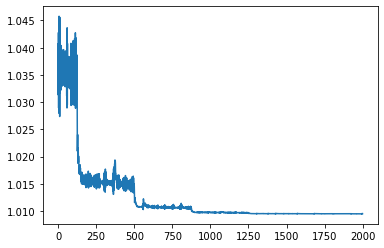

In [10]:
plt.plot(loss_monitor[1000:])

In [6]:
store_dense_matrix_to_submission(os.path.join(data_dir, 'sampleSubmission.csv'), os.path.join(data_dir, 'mysub.csv'), prediction)

Loading requests specified by submission samples...
Storing 1176952 records for submission as requested...
